In [1]:
#Importing Temperature Prediction Model
import warnings
warnings.filterwarnings('ignore')
#from sklearn.tree import BaseDecisionTree
import joblib
MAIN = r'C:\Users\San\agritech\Weather-Prediction-Model-IBM\Trained Models for Sharing'
TEMP = joblib.load(MAIN+'\TDecisionTree.pkl')

'''Comment for myself
T takes 7 argument to predict the temperature
in sequential order they are Date, Month, Hour, current heatindex, humidity, rain, temperature 6 hours ago'''

'Comment for myself\nT takes 7 argument to predict the temperature\nin sequential order they are Date, Month, Hour, current heatindex, humidity, rain, temperature 6 hours ago'

In [2]:
#Importing Precipitation Prediction Model

PREC = joblib.load(MAIN + '\PLogisticRegression.pkl')
PPP = joblib.load(MAIN + '\PRandomForest.pkl')

'''Comment for myself
P takes 7 argument to predict the precipitation
in sequential order they are Date, Month, Hour, current dewpoint, humidity, thunder, whether it rained 6 hours ago'''

'Comment for myself\nP takes 7 argument to predict the precipitation\nin sequential order they are Date, Month, Hour, current dewpoint, humidity, thunder, whether it rained 6 hours ago'

In [3]:
#Importing Humidity Predcition Model
from sklearn.externals import joblib
HUM = joblib.load(r'C:\Users\San\agritech\Weather-Prediction-Model-IBM\Predicting Humidity\nHRandomForest.pkl')

'''Comment for myself
T takes 8 argument to predict the humidity
in sequential order they are Date, Month, Hour, dewpt, heatindex, temp, rain, humidity previous'''

'Comment for myself\nT takes 8 argument to predict the humidity\nin sequential order they are Date, Month, Hour, dewpt, heatindex, temp, rain, humidity previous'

In [4]:
#Importing all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
!pip install pyserial

You should consider upgrading via the 'c:\users\san\agritech\agritech\scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
#Code to be runned with Arduino in connection

import serial
import time

# set up the serial line
ser = serial.Serial('COM7', 9600)
time.sleep(2)

# Read and record the data
data =[]                       # empty list to store the data
flag = False

while flag==False:
    b = ser.readline()         # read a byte string
    string_n = b.decode()  # decode byte string into Unicode  
    string = string_n.rstrip() # remove \n and \r       # convert string to float
    if len(string.split(" ")) == 8:
        print(string)
        flag = True
    time.sleep(0.1)            # wait (sleep) 0.1 seconds

ser.close()

l=string.split(" ")
l=tuple([float(i) for i in l])
print(l)
'''
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data)
plt.xlabel('Time (seconds)')
plt.ylabel('Potentiometer Reading')
plt.title('Potentiometer Reading vs. Time')
plt.show()'''

19.95 54.33 995.93 183.39 10.45 1203.08 19.42 9.36
(19.95, 54.33, 995.93, 183.39, 10.45, 1203.08, 19.42, 9.36)


"\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nplt.plot(data)\nplt.xlabel('Time (seconds)')\nplt.ylabel('Potentiometer Reading')\nplt.title('Potentiometer Reading vs. Time')\nplt.show()"

In [7]:
#Code to split and use the data for predictions

#The code will be modified based on type of Data

# show the data
    
print(l)
h=l[1]
t=int(l[0])


(19.95, 54.33, 995.93, 183.39, 10.45, 1203.08, 19.42, 9.36)


In [8]:
#Dew Point

def ln(n):
    return math.log(n,math.e)
def Tdew(T,H):
    nl =ln(H/100)
    s=237.3+T
    m=17.27*T
    TD = (237.3*(nl+(m/s)))/(17.27+(-1)*(nl+(m/s)))    
    return TD

In [9]:
#Heat Index

def HI(t,H):
    c1 = -42.379
    c2= 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 *(0.001)
    c6 = -5.481717 * (0.01)
    c7 = 1.22874 * (0.001)
    c8 = 8.5282 * (0.0001)
    c9 = -1.99 * (0.000001)
    T=(1.8*t)+32
    HI=c1+(c2*T)+(c3*H)+(c4*T*H)+(c5*T*T)+(c6*H*H)+(c7*T*H*T)+(c8*T*H*H)+(c9*T*H*T*H)
    FHI=((HI-32)*5)/9
    return FHI

In [10]:
#poly = joblib.load(MAIN+'\Poly.pkl')

In [11]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)

In [12]:
#Taking all the initial variables with their values some value are taken as input which need to be changed
# upon integration with Hardware

#t=int(input("Enter the temperature in Celsuius:"))
#h=int(input("Enter the relative humidity: "))
p=int(input("Tell whether it is raining presently or not, 0 for no and 1 for yes: "))


Tell whether it is raining presently or not, 0 for no and 1 for yes: 0


In [13]:
#For hourly, daily, weekly and min max temp details
L=[]

from datetime import datetime
datetime.today()
date=datetime.now()

da=date.day
hr=date.hour
mn=date.month

In [14]:
#t6,h6,p6 are for 6 hours ago
t6=38
h6=60
p6=0

#RH,P,T are for current data
RH=h
P=p
T=t
print(RH,P,T)

#Variables and list for data  (d stands for day)
dd=[]
hdd=[]
td=[]
hd=[]
pd=[]


#Variables and list for data  (r stands for representation)
DR=[]
HRR=[]
TR=[]
HR=[]
PR=[]

#Calculating Maximum and minimum temperatures
MxT=[]
MnT=[]


for d in range(0,11):
    for h in range(0,5):
        
        #TP,PP,HP are for 1 hour in future data
        
        dewpoint=Tdew(T,RH)
        print("Dew Point at",hr,da,mn,"is equal to",dewpoint)
                
        heatindex=HI(T,RH)
        print("Heat Index at",hr,da,mn,"is equal to",heatindex)
        
        t_=np.array([da,mn,hr,heatindex,RH,P,t6]).reshape(1,-1)
        TP=list(TEMP.predict(t_))[0]
        #TP=list(TEMP.predict(poly.fit_transform(t_)))[0]
        print("Temperature predicted at",hr,da,mn,"is equal to",TP)
        
        p_=np.array([da,mn,hr,dewpoint,RH,1,p6]).reshape(1,-1)
        PP=list(PREC.predict(p_))[0]
        print("Precipitation predicted at",hr,da,mn,"is equal to",PP)
        
        h_=np.array([da,mn,hr,dewpoint,heatindex,T,P,h6]).reshape(1,-1)
        HP=list(HUM.predict(h_))[0]
        #HP=abs(list(HUM.predict(poly.fit_transform(h_)))[0])
        
        print("Humidity predicted at",hr,da,mn,"is equal to",HP)
        
        print("")
        print("")
        
        #Converting array to no.
        #HP=list(HP)[0]
        #TP=list(TP)[0]
        #PP=list(PP)[0]
        
        #Adding prediction for a day list to take the mean
        dd.append(dewpoint)
        hdd.append(heatindex)
        td.append(TP)
        hd.append(HP)
        pd.append(PP)
        
        
        #Upddating THE previous variables
        t6=T
        h6=RH
        p6=P
                
        T=TP
        RH=HP
        P=PP
                
        #Updating Date and Time is final
        hr+=6
        if hr>=24:
            hr=0
            h=24
            da+=1
        if da==31:
            mn+=1
            da=1
    
    #Calculating mean of all the variables for a day
    DR.append(np.mean(dd))
    HRR.append(np.mean(hdd))
    TR.append(np.mean(td))
    HR.append(np.mean(hd))
    PR.append(np.mean(pd))
    
    #Calculating Maximum and Minimum Temperature
    MxT.append(max(td))
    MnT.append(min(td))
    
    dd.clear()
    hdd.clear()
    td.clear()
    hd.clear()
    pd.clear()
    
    
        


54.33 0 19
Dew Point at 17 15 1 is equal to 9.580208436038957
Heat Index at 17 15 1 is equal to 25.37696177599091
Temperature predicted at 17 15 1 is equal to 27.0
Precipitation predicted at 17 15 1 is equal to 0
Humidity predicted at 17 15 1 is equal to 63.09


Dew Point at 23 15 1 is equal to 19.37530350361926
Heat Index at 23 15 1 is equal to 28.308678699889512
Temperature predicted at 23 15 1 is equal to 27.0
Precipitation predicted at 23 15 1 is equal to 1
Humidity predicted at 23 15 1 is equal to 52.54


Dew Point at 0 16 1 is equal to 16.46692824794086
Heat Index at 0 16 1 is equal to 27.575278776622792
Temperature predicted at 0 16 1 is equal to 27.0
Precipitation predicted at 0 16 1 is equal to 1
Humidity predicted at 0 16 1 is equal to 65.71


Dew Point at 6 16 1 is equal to 20.03108868907155
Heat Index at 6 16 1 is equal to 28.509835458312764
Temperature predicted at 6 16 1 is equal to 27.0
Precipitation predicted at 6 16 1 is equal to 1
Humidity predicted at 6 16 1 is equal

Humidity predicted at 6 26 1 is equal to 37.23


Dew Point at 12 26 1 is equal to 3.1969385301758537
Heat Index at 12 26 1 is equal to 25.782689283177547
Temperature predicted at 12 26 1 is equal to 27.0
Precipitation predicted at 12 26 1 is equal to 0
Humidity predicted at 12 26 1 is equal to 88.73


Dew Point at 18 26 1 is equal to 24.977455742191115
Heat Index at 18 26 1 is equal to 30.602654683504667
Temperature predicted at 18 26 1 is equal to 8.0
Precipitation predicted at 18 26 1 is equal to 1
Humidity predicted at 18 26 1 is equal to 50.29


Dew Point at 0 27 1 is equal to -1.6935186005314562
Heat Index at 0 27 1 is equal to 41.81598068580173
Temperature predicted at 0 27 1 is equal to 36.0
Precipitation predicted at 0 27 1 is equal to 0
Humidity predicted at 0 27 1 is equal to 86.1


Dew Point at 6 27 1 is equal to 33.299251550108245
Heat Index at 6 27 1 is equal to 65.95210110195775
Temperature predicted at 6 27 1 is equal to 13.0
Precipitation predicted at 6 27 1 is equal to

In [15]:
DR=np.array(DR)
HRR=np.array(HRR)
TR=np.array(TR)
HR=np.array(HR)
PR=np.array(PR)
MxT=np.array(MxT)
MnT=np.array(MnT)

In [16]:
#Data Representation
#Date
#Min Max Temperature
#Precipitation percentage
#Humidity
#Dew point
#Heat index  + at end All the graphs

In [19]:
da=date.day
mn=date.month
yr=date.year

if da==31:
    mn+=1
    da=1

''''def Gen():
    for i in range(1,15):
        yield i
x=Gen() '''

for i in range(10):
    print("Date"," ",da,"-",mn,"-",yr,sep='')
    print("")
    print("Maximum Temperature is:",MxT[i])
    print("Minimum Temperature is:",MnT[i])
    if PR[i]>0:
        print("It will rain probability is",PR[i]*100,'%')
    else:
        print("It will not rain")
    print("Dew point is:",DR[i])
    print("Heat Index is:",HRR[i])
    print("Humidity is:",HR[i],'%')
    
    print()
    print()
    
    #i+=1
    da+=1
    
    
    if da==31:
        mn = mn+1
        da=1
    

Date 15-1-2022

Maximum Temperature is: 27.0
Minimum Temperature is: 27.0
It will rain probability is 80.0 %
Dew point is: 16.38169797260891
Heat Index is: 27.468697272185427
Humidity is: 62.32733333333333 %


Date 16-1-2022

Maximum Temperature is: 27.0
Minimum Temperature is: 16.0
It will rain probability is 100.0 %
Dew point is: 19.0102010299761
Heat Index is: 27.767497361271364
Humidity is: 68.2505 %


Date 17-1-2022

Maximum Temperature is: 27.0
Minimum Temperature is: 16.0
It will rain probability is 100.0 %
Dew point is: 15.043132644700908
Heat Index is: 27.819240686840466
Humidity is: 72.2585 %


Date 18-1-2022

Maximum Temperature is: 32.0
Minimum Temperature is: 10.0
It will rain probability is 100.0 %
Dew point is: 17.642618112493693
Heat Index is: 34.263455499638006
Humidity is: 67.0725 %


Date 19-1-2022

Maximum Temperature is: 32.0
Minimum Temperature is: 10.0
It will rain probability is 40.0 %
Dew point is: 13.126421114471986
Heat Index is: 33.838171120365146
Humidity i

Dew Point


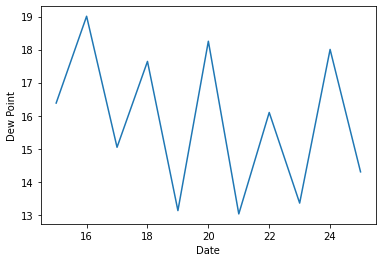

Heat Index


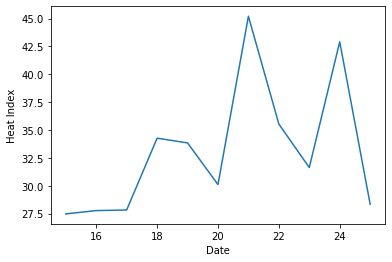

Temperature


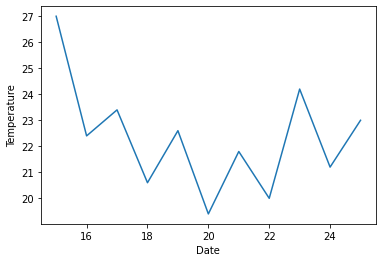

Precipitation chances


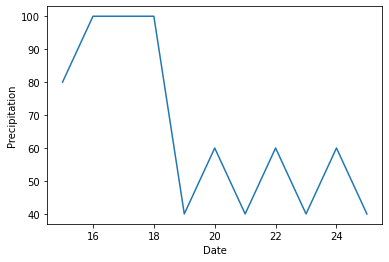

Humidity


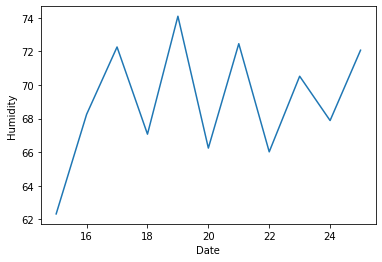

In [18]:
da=date.day
Day=np.arange(da, da+11)

#Plotting Dew Point
print("Dew Point")
plt.xlabel("Date")
plt.ylabel("Dew Point")
plt.plot(Day,DR)
plt.show()

#Plotting Heat Index
print("Heat Index")
plt.xlabel("Date")
plt.ylabel("Heat Index")
plt.plot(Day,HRR)
plt.show()

#Plotting Temperature
print("Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.plot(Day,TR)
plt.show()

#Plotting Precipitation
print("Precipitation chances")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.plot(Day,PR*100)
plt.show()

#Plotting Humidity
print("Humidity")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.plot(Day,HR)
plt.show()

In [ ]:
DR